In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
data = pd.read_csv("data/data.csv")
# data = pd.read_csv("data/data_aa.csv")[['ORIGIN_STATE_FIPS', 'ROUNDTRIP', 'ITIN_YIELD', 'ITIN_FARE', 'DISTANCE']]

# target = data[['ORIGIN_STATE_FIPS', 'ROUNDTRIP', 'ITIN_YIELD', 'DISTANCE']]
# target = data[['COUPONS', 'YEAR', 'ORIGIN_STATE_FIPS', 'ROUNDTRIP', 'ONLINE', 'DOLLAR_CRED', 'ITIN_YIELD','DISTANCE']]
target = data[['ITIN_YIELD', 'DISTANCE']]
# target = data[['ITIN_YIELD']]
predicted_column = data['ITIN_FARE']

# predicted_column
# target
# data.head()

In [4]:
# ordinary linear  regression

X_train, X_test, y_train, y_test = train_test_split(target, predicted_column, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.57
Test set score: 0.39


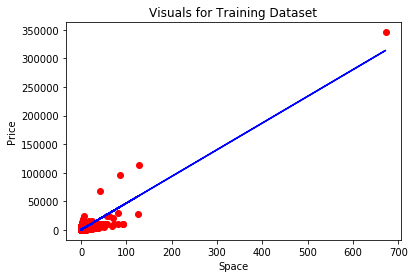

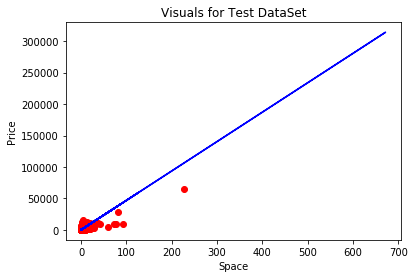

In [16]:
#Predicting the prices
pred = lr.predict(X_test)

#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [7]:
# With ridge

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(target, predicted_column, random_state=0)

ridge = Ridge().fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.58
Test set score: 0.39


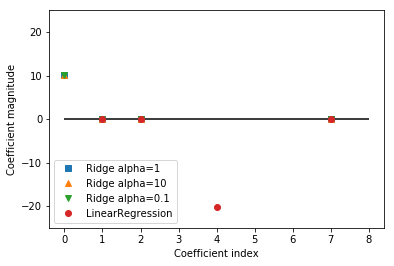

In [39]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [3]:
from sklearn.linear_model import BayesianRidge, LinearRegression
# from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(target, predicted_column, random_state=0)

# bayesRidge = GaussianNB()
bayesRidge = BayesianRidge(compute_score=True)
# GaussianNB(priors=None)
bayesRidge.fit(X_train, y_train)

print("Training set score: {:.2f}".format(bayesRidge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(bayesRidge.score(X_test, y_test)))

Training set score: 0.58
Test set score: 0.39
